# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [34]:
cities

['cape town',
 'mataura',
 'mineiros',
 'lianran',
 'busselton',
 'chuy',
 'kalakamati',
 'mahebourg',
 'axim',
 'nizhneyansk',
 'bredasdorp',
 'hilo',
 'caravelas',
 'arraial do cabo',
 'illoqqortoormiut',
 'saint-philippe',
 'iqaluit',
 'san patricio',
 'rikitea',
 'katsuura',
 'kruisfontein',
 'kiruna',
 'batemans bay',
 'port alfred',
 'ushuaia',
 'severo-kurilsk',
 'chokurdakh',
 'hermanus',
 'kloulklubed',
 'albany',
 'arona',
 'avarua',
 'vallenar',
 'nouadhibou',
 'dharchula',
 'jamestown',
 'esso',
 'amderma',
 'port elizabeth',
 'clyde river',
 'port lincoln',
 'heinola',
 'sorong',
 'maamba',
 'utiroa',
 'pilane',
 'eldorado',
 'young',
 'carnarvon',
 'atuona',
 'tolaga bay',
 'palmer',
 'buraydah',
 'upernavik',
 'new norfolk',
 'faya',
 'verkhnyaya inta',
 'atherton',
 'punta arenas',
 'takoradi',
 'anadyr',
 'vao',
 'nikolskoye',
 'salimbalan',
 'vaini',
 'khatanga',
 'meulaboh',
 'sechenovo',
 'pasighat',
 'yar-sale',
 'curuca',
 'karpogory',
 'vila franca do campo',
 'p

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="

# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")


Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | xining
Processing Record 4 of Set 1 | mayo
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | nouna
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | iwaki
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | sur
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | kargopol
Processing Record 16 of Set 1 | kudahuvadhoo
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | kavaratti
Processing Record 19 of Set 1 | lodwar
Processing Record 20 of Set 1 | havre-saint-pierre
Processing Record 21 of Set 1 | liverpool
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | ilulissat
Processing Record 24 of Set 1 | saint-phil

City not found. Skipping...
City not found. Skipping...
Processing Record 35 of Set 4 | karratha
Processing Record 36 of Set 4 | novobeysugskaya
Processing Record 37 of Set 4 | atambua
Processing Record 38 of Set 4 | baykit
Processing Record 39 of Set 4 | novoagansk
Processing Record 40 of Set 4 | ust-maya
Processing Record 41 of Set 4 | clyde river
Processing Record 42 of Set 4 | byron bay
City not found. Skipping...
Processing Record 43 of Set 4 | salisbury
Processing Record 44 of Set 4 | itarema
Processing Record 45 of Set 4 | wajir
Processing Record 46 of Set 4 | tuktoyaktuk
Processing Record 47 of Set 4 | hithadhoo
Processing Record 48 of Set 4 | luganville
Processing Record 49 of Set 4 | zarubino
Processing Record 1 of Set 5 | dingle
Processing Record 2 of Set 5 | vrangel
Processing Record 3 of Set 5 | mbandaka
Processing Record 4 of Set 5 | port-gentil
Processing Record 5 of Set 5 | tereze
City not found. Skipping...
Processing Record 6 of Set 5 | esperance
Processing Record 7 o

Processing Record 25 of Set 8 | blythe
Processing Record 26 of Set 8 | derbent
City not found. Skipping...
Processing Record 27 of Set 8 | cerritos
Processing Record 28 of Set 8 | nabire
Processing Record 29 of Set 8 | nicoya
Processing Record 30 of Set 8 | humaita
Processing Record 31 of Set 8 | luba
Processing Record 32 of Set 8 | ziro
Processing Record 33 of Set 8 | tuatapere
City not found. Skipping...
Processing Record 34 of Set 8 | roebourne
Processing Record 35 of Set 8 | portland
Processing Record 36 of Set 8 | damietta
City not found. Skipping...
Processing Record 37 of Set 8 | santa vitoria do palmar
Processing Record 38 of Set 8 | alice town
Processing Record 39 of Set 8 | severo-kurilsk
Processing Record 40 of Set 8 | kovdor
City not found. Skipping...
Processing Record 41 of Set 8 | moron
Processing Record 42 of Set 8 | oussouye
Processing Record 43 of Set 8 | muros
Processing Record 44 of Set 8 | unai
Processing Record 45 of Set 8 | lakhdenpokhya
Processing Record 46 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [48]:
weather_dataframe = pd.DataFrame(weather_dict)

# output data to csv
weather_dataframe.to_csv(output_data_file)
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,90,AR,1572917763,80,-54.81,-68.31,39.20,10.29
1,busselton,97,AU,1572917987,45,-33.64,115.35,73.00,8.61
2,xining,100,CN,1572917988,74,36.62,101.77,37.67,2.55
3,mayo,5,CA,1572917988,72,63.59,-135.90,10.40,6.93
4,namibe,100,AO,1572917989,89,-15.19,12.15,73.04,9.53


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

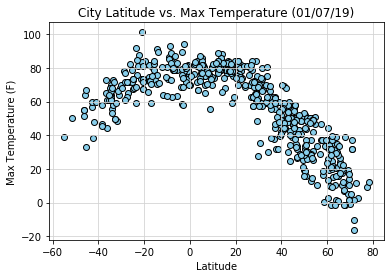

In [45]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/LatVsTempPlot.png")
plt.show()

#### Latitude vs. Humidity Plot

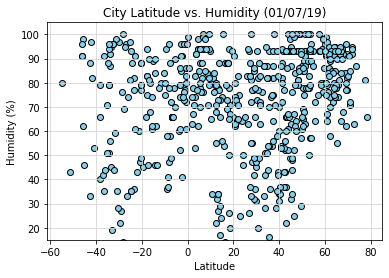

In [46]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/CityLatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

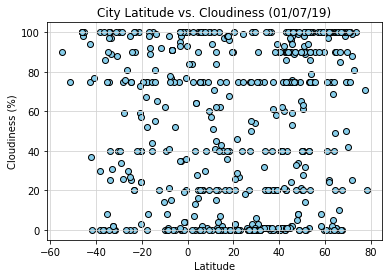

In [49]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

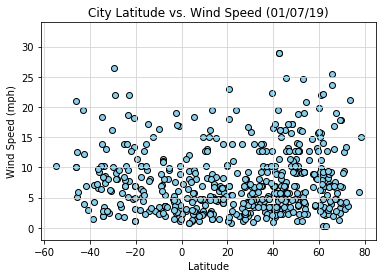

In [50]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/LatVsWindSpeed.png")
plt.show()